In [1]:
# Homework 1
# Joshua Lave
# ATOC 5860 - Objective Data Analysis
# I am not accustomed to programming in notebooks! Let's see how it goes.

%matplotlib inline

from math import sqrt
import pickle
import statistics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Problem 1.a
# Define our variables

n = 0.9 # COVID negative background rate
p = 0.1 # COVID positive background rate
tn = 0.8 # COVID negative test accuracy rate
tp = 0.2 # COVID negative test inaccuracy rate

# Bayes Theorem
# Read: Probability that friend is actually negative given the background COVID rate.

prob_neg_true = (tn*n)/((tn*n)+(tp*p))

print(round(prob_neg_true,2))

0.97


In [3]:
# Problem 1.c
# The raw L1b products downloaded from AWS include data in the form of radiances. 
# The datasets available on github are daily, domain-averaged brightness temperatures which were converted from radiances following the procedure
# outlined in the ABI PUG (https://www.goes-r.gov/users/docs/PUG-L1b-vol3.pdf, page 28). The code to go from L1b radiances to the supplied dataset
# is provided in the comment block below.

'''
from glob import glob
import pickle

import numexpr as ne
import numpy as np
import xarray as xr

mean_bt_list = []

# To loop through a file list:
# file_list = sorted(glob('/{path}/{to}/{L1b}/{data}/*'))
# for f in file_list:

ds = xr.open_dataset('{f}')

fk1 = float(ds.planck_fk1.data)
fk2 = float(ds.planck_fk2.data)
bc1 = float(ds.planck_bc1.data)
bc2 = float(ds.planck_bc2.data)
rad = ds.Rad.data

bt = ne.evaluate('((b/log((a/rad)+1)-c)/d)-273.15',
                 {'a': fk1, 'b': fk2, 'c': bc1, 'd': bc2, 'rad': rad})

mean_bt = round(np.nanmean(bt),3)
mean_bt_list.append(mean_bt)

# To save the list:
# with open('Daily_Mean_BT_{YEAR}','wb') as f:
#   pickle.dump(mean_bt_list,f)

'''

"\nfrom glob import glob\nimport pickle\n\nimport numexpr as ne\nimport numpy as np\nimport xarray as xr\n\nmean_bt_list = []\n\n# To loop through a file list:\n# file_list = sorted(glob('/{path}/{to}/{L1b}/{data}/*'))\n# for f in file_list:\n\nds = xr.open_dataset('{f}')\n\nfk1 = float(ds.planck_fk1.data)\nfk2 = float(ds.planck_fk2.data)\nbc1 = float(ds.planck_bc1.data)\nbc2 = float(ds.planck_bc2.data)\nrad = ds.Rad.data\n\nbt = ne.evaluate('((b/log((a/rad)+1)-c)/d)-273.15',\n                 {'a': fk1, 'b': fk2, 'c': bc1, 'd': bc2, 'rad': rad})\n\nmean_bt = round(np.nanmean(bt),3)\nmean_bt_list.append(mean_bt)\n\n# To save the list:\n# with open('Daily_Mean_BT_{YEAR}','wb') as f:\n#   pickle.dump(mean_bt_list,f)\n\n"

In [4]:
# Problem 1.c (continued)
# Now we can compare the sample means.

with open('Daily_Mean_BT_2020','rb') as f:
    Daily_Mean_BT_2020 = pickle.load(f)
    
with open('Daily_Mean_BT_2021','rb') as f:
    Daily_Mean_BT_2021 = pickle.load(f)

# Find N, mean, and std for each sample

N_2020 = len(Daily_Mean_BT_2020)
mean_2020 = round(statistics.mean(Daily_Mean_BT_2020),3)
std_2020 = round(statistics.stdev(Daily_Mean_BT_2020),3)

print('2020 statistics: N = '+str(N_2020)+ '  Mean = '+str(mean_2020)+'  Std = '+str(std_2020))

N_2021 = len(Daily_Mean_BT_2021)
mean_2021 = round(statistics.mean(Daily_Mean_BT_2021),3)
std_2021 = round(statistics.stdev(Daily_Mean_BT_2021),3)

print('2021 statistics: N = '+str(N_2021)+ '  Mean = '+str(mean_2021)+'  Std = '+str(std_2021))

# Calculate the z-statistic

z = ((mean_2021-mean_2020)-0)/sqrt((std_2021**2)/N_2021+(std_2020**2)/N_2020)
print(round(z,4))

2020 statistics: N = 30  Mean = -19.735  Std = 1.024
2021 statistics: N = 30  Mean = -19.561  Std = 1.019
0.6597


In [5]:
# Problem 1.d
# Just a quick confidence interval calculation

lower = round(mean_2020-1.96*(std_2020/sqrt(N_2020)),3)
upper = round(mean_2020+1.96*(std_2020/sqrt(N_2020)),3)

print('95% confidence interval: '+str(lower)+' to '+str(upper))

95% confidence interval: -20.101 to -19.369


In [6]:
# Problem 1.e
# Just a quick f-score calculation

f = round((std_2020**2)/(std_2021**2),3)

print('The f-score is: '+str(f))

The f-score is: 1.01


In [7]:
# Now on to problem 2
# Problem 2.a

# First read in the data and look at the data!
# Its always a good idea with pandas to check that column names and indexes are what we expect.

data = pd.read_csv('homework1_data.csv')
data

,P_hPa,R_inches
0,842.63,0.0
1,842.58,0.0
2,842.13,0.0
3,842.38,0.0
4,842.57,0.0
...,...,...
8755,850.60,0.0
8756,850.54,0.0
8757,850.17,0.0
8758,850.09,0.0


Mean pressure during all hours: 846.332
Mean pressure during rain hours: 847.031


Text(0, 0.5, 'Frequency')

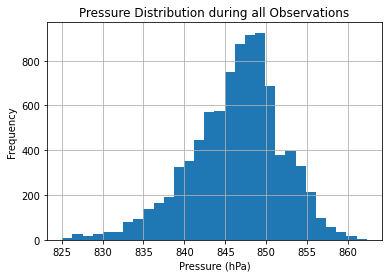

In [8]:
# Problem 2.a continued

# Find the mean pressure during all times and just during precipitation.

p_mean_all = round(data.P_hPa.mean(),3)
p_mean_rain = round(data[data['R_inches'] >= 0.01].P_hPa.mean(),3)

print('Mean pressure during all hours: '+str(p_mean_all))
print('Mean pressure during rain hours: '+str(p_mean_rain))

# We can also plot a histogram of the population distribution

data.P_hPa.hist(bins=30)
plt.title('Pressure Distribution during all Observations')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')

In [9]:
# Problem 2.b

# Here we are going to define confidence intervals using the z and t statistics.
# We first need to define our set of variables

# Stats for all observations
p_mean_all = round(data.P_hPa.mean(),3)
p_std_all = round(data.P_hPa.std(),3)
p_N_all = len(data.P_hPa)

# Stats for rain observations
p_mean_rain = round(data[data['R_inches'] >= 0.01].P_hPa.mean(),3)
p_std_rain = round(data[data['R_inches'] >= 0.01].P_hPa.std(),3)
p_N_rain = len(data[data['R_inches'] >= 0.01].P_hPa)

print('For all observations - ')
print('Mean pressure: '+str(p_mean_all))
print('Pressure standard deviation: '+str(p_std_all))
print('Number of observations: '+str(p_N_all)+'\n')

print('For rain observations - ')
print('Mean pressure: '+str(p_mean_rain))
print('Pressure standard deviation: '+str(p_std_rain))
print('Number of observations: '+str(p_N_rain)+'\n')

# Since we are looking for anomalous pressure, we will use a two-tailed test.
# At 384 observations, our t-stat has converged to the corresponding z-stat to two decimal places.

z_c = 1.96
t_c = 1.96

# Now we can calculate a z-score
z = round((p_mean_rain-p_mean_all)/(p_std_all/sqrt(p_N_rain)),3)

print('Z = '+str(z)+'\n')

# We can also calculate confidence intervals around the sample mean for samples of size p_N_rain

# z-statistic...
lower_z = round(p_mean_all-1.96*(p_std_all/sqrt(p_N_rain)),3)
upper_z = round(p_mean_all+1.96*(p_std_all/sqrt(p_N_rain)),3)

# t-statistic...
lower_t = round(p_mean_all-1.96*(p_std_all/sqrt(p_N_rain-1)),3)
upper_t = round(p_mean_all+1.96*(p_std_all/sqrt(p_N_rain-1)),3)

print('z-statistic 95% confidence interval: '+str(lower_z)+' to '+str(upper_z))
print('t-statistic 95% confidence interval: '+str(lower_t)+' to '+str(upper_t))

For all observations - 
Mean pressure: 846.332
Pressure standard deviation: 5.617
Number of observations: 8760

For rain observations - 
Mean pressure: 847.031
Pressure standard deviation: 5.386
Number of observations: 384

Z = 2.439

z-statistic 95% confidence interval: 845.77 to 846.894
t-statistic 95% confidence interval: 845.769 to 846.895


Bootstrap mean: 846.33
Bootstrap standard deviation: 0.285

Z-statistic (number of standard errors that the sample mean deviates from the population mean): 2.46



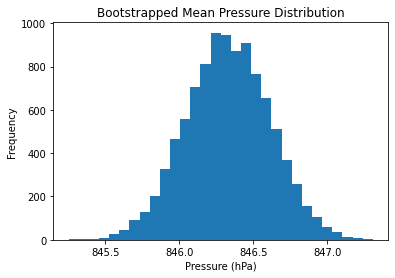

In [10]:
# Problem 3.c

# Generate a set of means of random samples of size p_N_rain. That is, bootstrap!

Ns = 10000
bs_list = []
for n in range(Ns):
    bs_list.append(np.random.choice(data.P_hPa,p_N_rain).mean())

# Let's take a look at our bootstrapped distribution.    

plt.hist(bs_list,bins=30)
plt.title('Bootstrapped Mean Pressure Distribution')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')

# Generate a few statistics about the bootstrapped distribution.

bs_list_mean = round(statistics.mean(bs_list),3)
bs_list_std = round(statistics.stdev(bs_list),3)

print('Bootstrap mean: '+str(bs_list_mean))
print('Bootstrap standard deviation: '+str(bs_list_std)+'\n')

# Now we can calculate the z-statistic

z_rain = round((p_mean_rain-bs_list_mean)/bs_list_std,3)

print('Z-statistic (number of standard errors that the sample mean deviates from the population mean): '+str(z_rain)+'\n')